# Prediction of the onset of diabetes based on diagnostic measures
Submitted by:  
+ Priya Chandra
+ Ranesha Pal
+ Sanchita Saha
+ Shreshta Sarkar

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import seaborn as sns

### **Reading the diabetes dataset**   

(Downloaded from [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database "Diabetes Dataset").)

In [3]:
#reading the diabetes dataset from the folder and storing it in a dataframe named diabetes
diabetes = pd.read_csv("./dataset/diabetes.csv")

### **Dimensions of the dataframe**

In [4]:
diabetes.shape

(768, 9)

### **Sample data in dataframe**

In [5]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **Problem description:**
+ **_Binary classification problem_**
+ _Label : 'Outcome' = 0 or 1_
+ _Features :_ 
    - 'Pregnancies'
    - 'Glucose'	
    - 'BloodPressure'	
    - 'SkinThickness'
    - 'Insulin'	
    - 'BMI'
    - 'DiabetesPedigreeFunction'
    - 'Age'	


### **Summary of the data**

In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## **Step 1: Visualisation (part 1)**

#### **Since we have discrete categorical data, we plot the estimate plots using countplot**

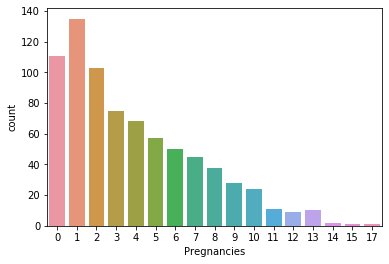

In [7]:
sns.countplot(diabetes['Pregnancies']);

#### **Plotting the rest of the features using countplots**

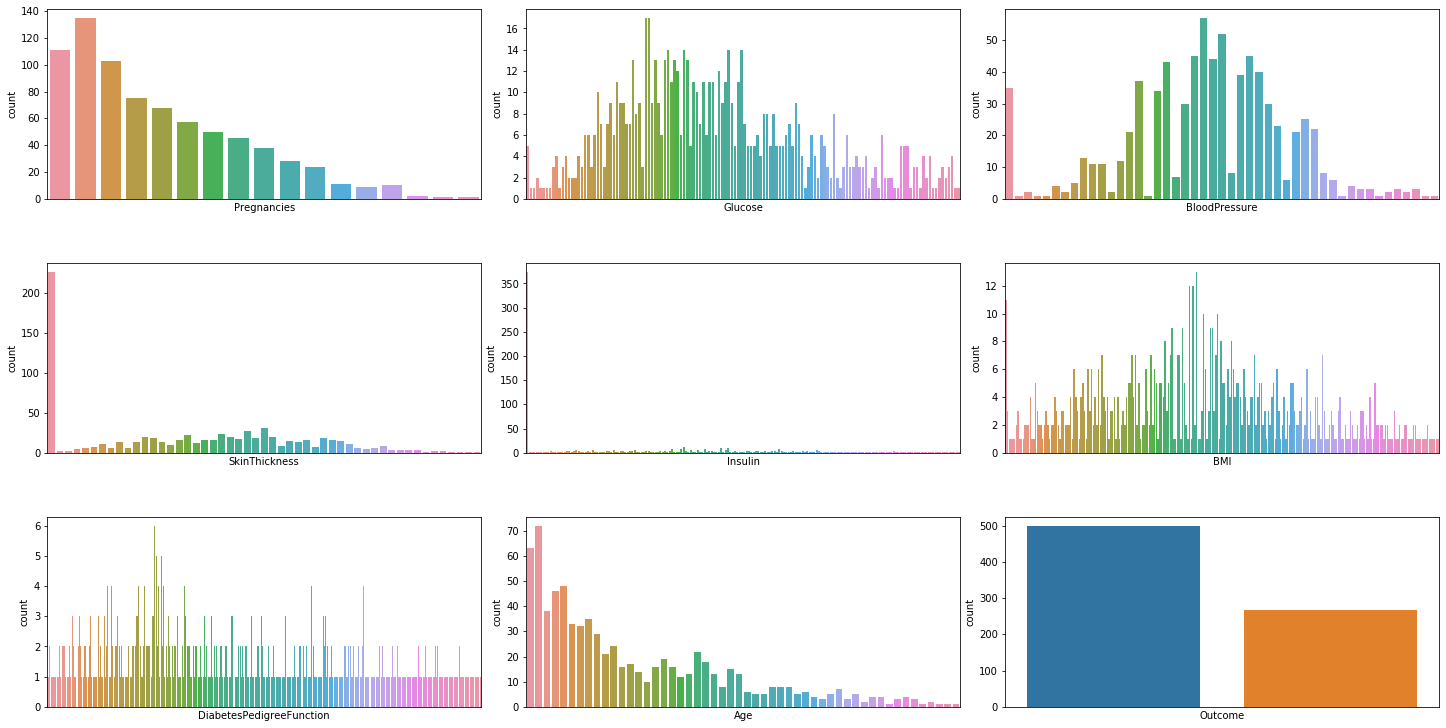

In [8]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i in diabetes.columns:
    sns.countplot(diabetes[i], ax=axs[index])
    axs[index].set_xticks([])
    index+=1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

**Inference:**   
+ _More data of non-diabetics present than diabetics._   
+ _Prediction accuracy whether a person is non-diabetic will be higher than him/her being diabetic._
+ _For features Skin Thickness, and Insulin, zero values must be imputed._

### **Visualising using distplot : evenness of data spread**
 **Output:** _A curve that roughly fits the distribution._  
  _(We also add a rugplot which marks each individual point on the x-axis)_

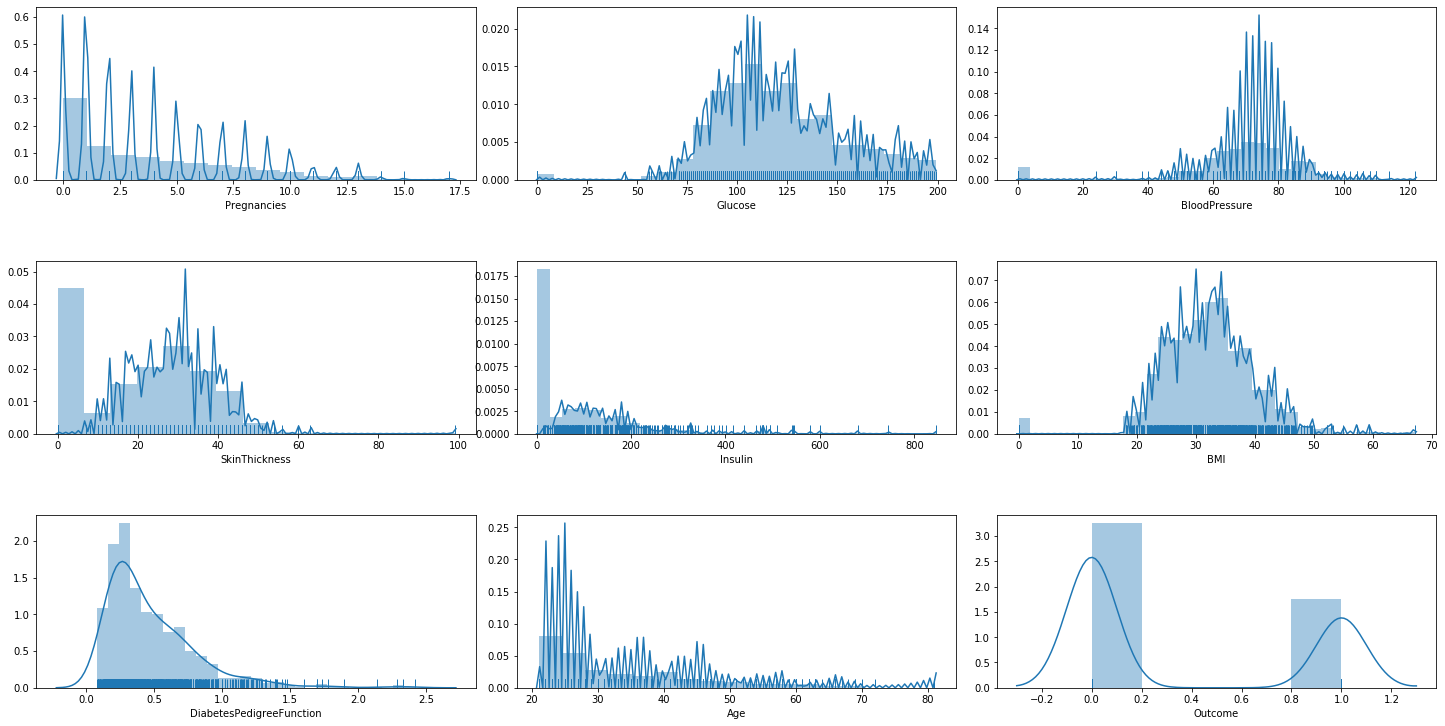

In [8]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in diabetes.items():
    sns.distplot(v, ax=axs[index],kde_kws={'bw': 0.1}, rug=True)
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

**Inference:**  
+ _Glucose, BP, BMI  have approximately normally distributed data._
+ _DiabetesPedigreeFunction peak has a slight shift to the left._ 
+ _SkinThickness, Insulin have a sharp spike, due to imputation of 0 values with a single fixed values._   
_To handle this, we use normalization/ standardisation further._

### **Step 2: Checking for missing value and string datatype and abnormal values**

In [9]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Inference:** _No null data present_

In [10]:
diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

**Inference:** _No string or object datatype present_

In [11]:
pd.DataFrame(diabetes[:]==0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

**Inference:** _Glucose, BP, SkinThickness, Insulin, BMI can't be 0 - data has to be processed_

### **Step 3: Imputing the abnormal values**

In [12]:
diabetes1 = diabetes.copy(deep=True) # copy of dataframe made in order to keep original dataframe unchanged

Using mean to impute the zero values for columns: Glucose, BP, SkinThickness, Insulin, BMI 

In [13]:
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'BMI']

for i in columns:
    avg = diabetes1[i][diabetes1[i]>0].mean() 
    diabetes1[i] = diabetes1[i].replace(to_replace=0, value=avg)

In [14]:
md = diabetes1['Insulin'][diabetes1['Insulin']>0].mode()[0] 
diabetes1['Insulin'] = diabetes1['Insulin'].replace(to_replace=0, value=md)

In [15]:
pd.DataFrame(diabetes1[:]==0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

**Inference:** _All zero values replaced with mean of the rest of the values._  
**Possible difficulty:** _The distribution of data maybe spiked since there were lot of zero values in particularly_ 'SkinThickness' _and_ 'Insulin' _columns._ 

### **Step 4: Data analysis and visualisation(part 2)**

In [16]:
diabetes1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,130.932292,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,88.700443,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,105.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,105.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Inference:** _High variation in all columns_  
**Possible solution:** _Scaling of data: either normalization or standardization_

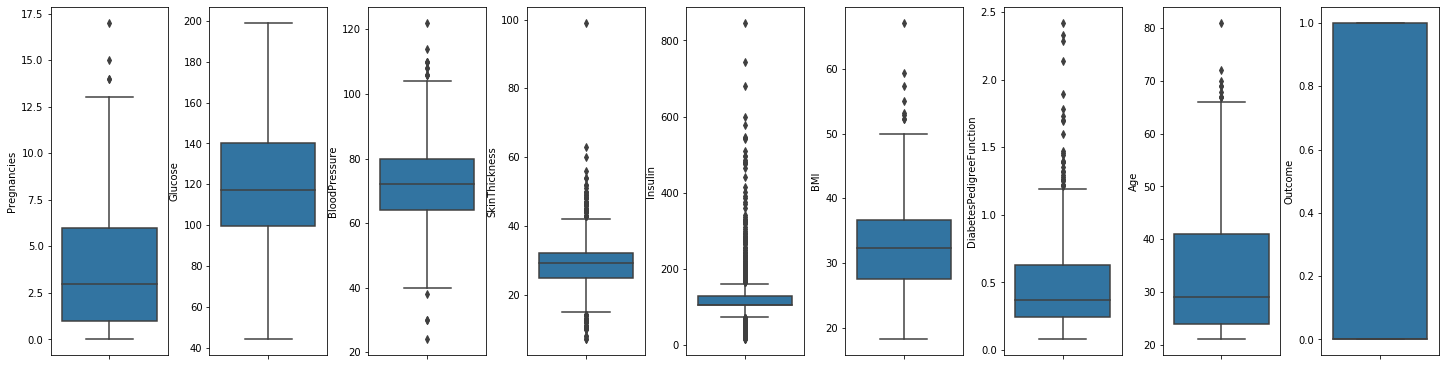

In [17]:
fig, axs = plt.subplots(ncols=9, nrows=1, figsize=(20, 5))
index = 0
axs = axs.flatten()

for k,v in diabetes1.items():
    sns.boxplot(y=v, data=diabetes1, ax=axs[index])
    index += 1
    
plt.tight_layout(pad=0.4, w_pad=0.1, h_pad=5.0)

**Inference:** _Imputation of abnormal values and plotting the boxplot, shows outliers towards the lower range have been successfully removed._

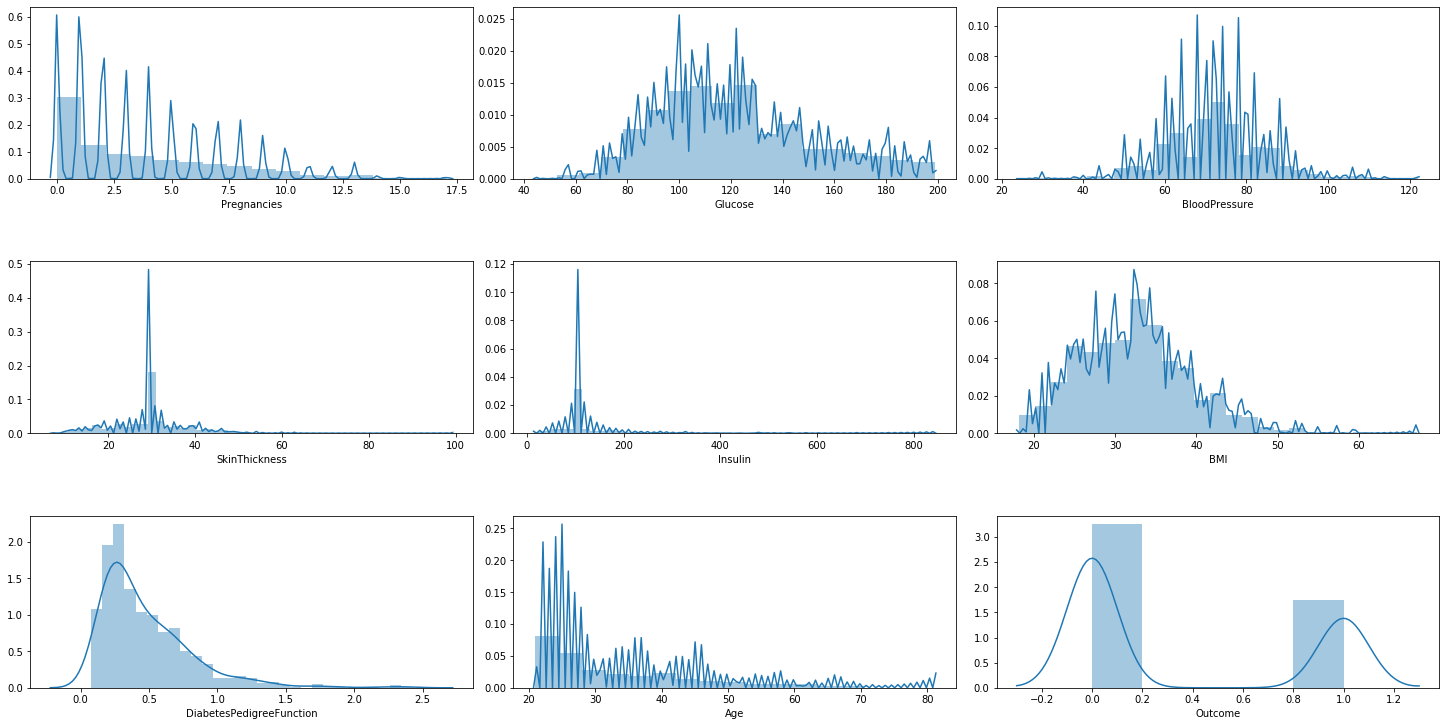

In [18]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in diabetes1.items():
    sns.distplot(v, ax=axs[index],kde_kws={'bw': 0.1}) # for some prob write kde
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

**Inference:** _Imputation of abnormal values and plotting the distplot, shows outliers towards the lower range have been successfully removed._

### **Step 5: Treating outliers**

In [19]:
diabetes1_0 = diabetes1.copy(deep=True)

In [20]:
for i in diabetes1_0.columns:
    upper = diabetes1_0[i].mean() + diabetes1_0[i].std()* 3.1
    print(upper)
    diabetes1_0 = diabetes1_0[~(diabetes1_0[i] >= upper)]

14.290744077699829
215.96139093651982
109.95551519808998
56.38625954346246
407.26345088203715
52.81267394865041
1.4346189055800067
69.44588978318626
1.8024381326507262


In [21]:
diabetes1_0.shape

(722, 9)

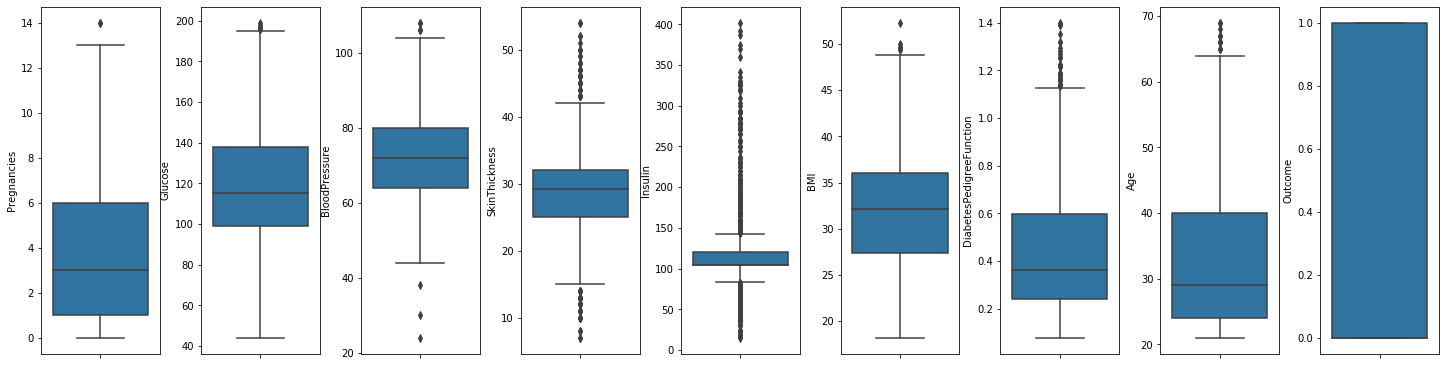

In [22]:
fig, axs = plt.subplots(ncols=9, nrows=1, figsize=(20, 5))
index = 0
axs = axs.flatten()

for k,v in diabetes1_0.items():
    sns.boxplot(y=v, data=diabetes1_0, ax=axs[index])
    index += 1
    
plt.tight_layout(pad=0.4, w_pad=0.1, h_pad=5.0)

<what to do with the upper limit outliers>
  
**Inference :**  
_Manual outlier not preferable as automatic outlier detection (see train test part) gives vetter accuracy score for ML models._
  

### **Step 6: Normalization/ Standardisation of data (visualisation part-2)**

In [23]:
diabetes2 = diabetes1.copy(deep=True)
sc = StandardScaler()

In [24]:
# scaling all feature columns
for i in diabetes2.columns[0:-1]:
    diabetes2[i] = sc.fit_transform(pd.DataFrame(diabetes2.loc[:, i]).values)

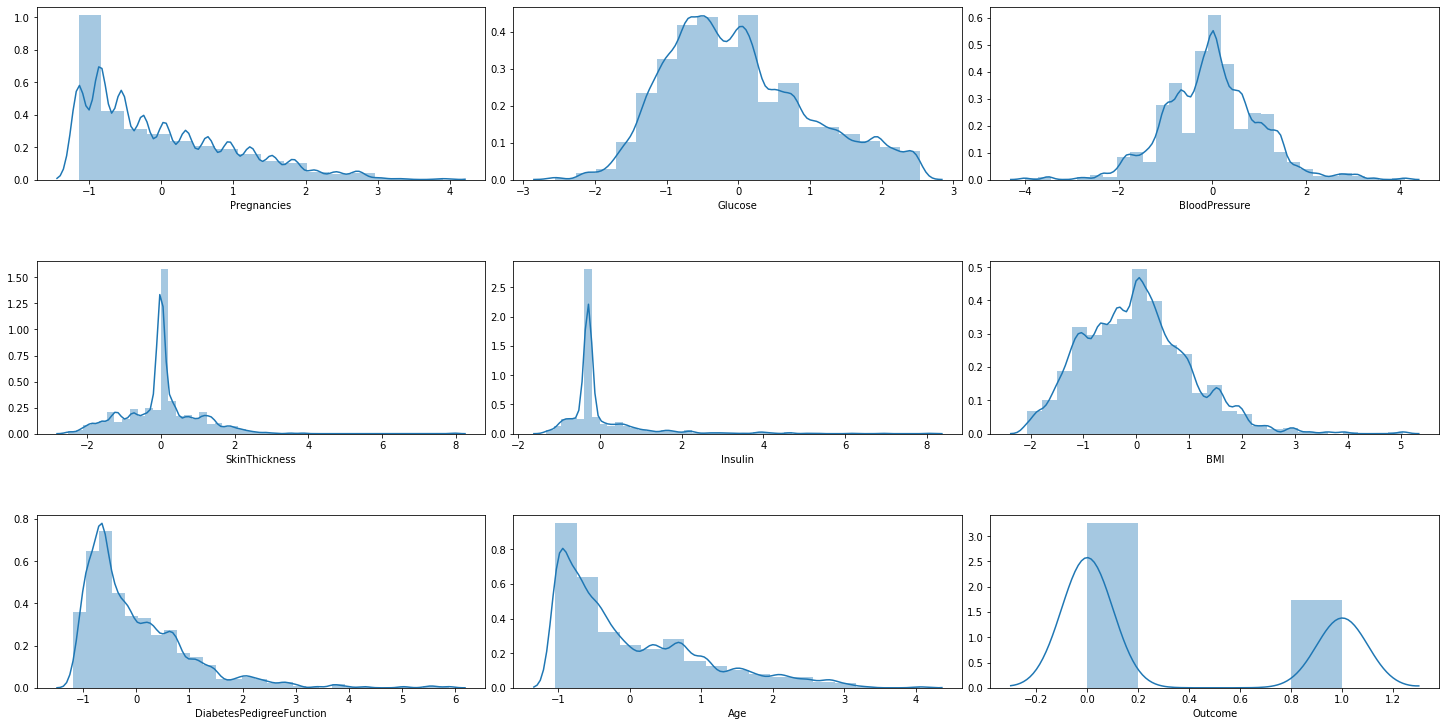

In [25]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in diabetes2.items():
    sns.distplot(v, ax=axs[index],kde_kws={'bw': 0.1}) # for some prob write kde
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

**Inference:**
+ Variation is less now; with mean as 0 and standard deviation as 1
+ Though the peaks in SkinThickness and Insulin could not be removed, the desired normal distribution has been achieved.

In [26]:
diabetes2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,768.000000
mean,-6.476301e-17,-3.561966e-16,6.915764e-16,7.956598e-16,1.063964e-16,3.515706e-16,2.451743e-16,1.931325e-16,0.348958
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,0.476951
min,-1.141852e+00,-2.554131e+00,-4.004245e+00,-2.521670e+00,-1.319142e+00,-2.075119e+00,-1.189553e+00,-1.041549e+00,0.000000
25%,-8.448851e-01,-7.212214e-01,-6.953060e-01,-4.727737e-01,-2.925486e-01,-7.215397e-01,-6.889685e-01,-7.862862e-01,0.000000
50%,-2.509521e-01,-1.540881e-01,-1.675912e-02,8.087936e-16,-2.925486e-01,-8.363615e-03,-3.001282e-01,-3.608474e-01,0.000000
75%,6.399473e-01,6.103090e-01,6.282695e-01,3.240194e-01,-4.154084e-02,6.029301e-01,4.662269e-01,6.602056e-01,1.000000
max,3.906578e+00,2.541850e+00,4.102655e+00,7.950467e+00,8.066856e+00,5.042087e+00,5.883565e+00,4.063716e+00,1.000000


**Inference:** _Variation is less now._

### **Step 7: Exploring linearity of data (visualisation - part 3)** 

In [27]:
diabetes2.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.127911,0.208522,0.082989,0.005204,0.021565,-0.033523,0.544341,0.221898
Glucose,0.127911,1.000000,0.218367,0.192991,0.411642,0.230941,0.137060,0.266534,0.492928
BloodPressure,0.208522,0.218367,1.000000,0.192816,0.027149,0.281268,-0.002763,0.324595,0.166074
SkinThickness,0.082989,0.192991,0.192816,1.000000,0.150020,0.542398,0.100966,0.127872,0.215299
Insulin,0.005204,0.411642,0.027149,0.150020,1.000000,0.185798,0.141959,0.070669,0.193850
BMI,0.021565,0.230941,0.281268,0.542398,0.185798,1.000000,0.153400,0.025519,0.311924
DiabetesPedigreeFunction,-0.033523,0.137060,-0.002763,0.100966,0.141959,0.153400,1.000000,0.033561,0.173844
Age,0.544341,0.266534,0.324595,0.127872,0.070669,0.025519,0.033561,1.000000,0.238356
Outcome,0.221898,0.492928,0.166074,0.215299,0.193850,0.311924,0.173844,0.238356,1.000000



**Inference:** _Comparatively higher correlation between_ 
+ _age and pregnancies, which is normal._
+ _skin thick and BMI, which also can be related_  

_Here maximum correlation is 0.54.  
Had there been any correlation value been > 0.8 we would have selected one feature of the two correlated feature.  
Here we are unable to eliminate any features._

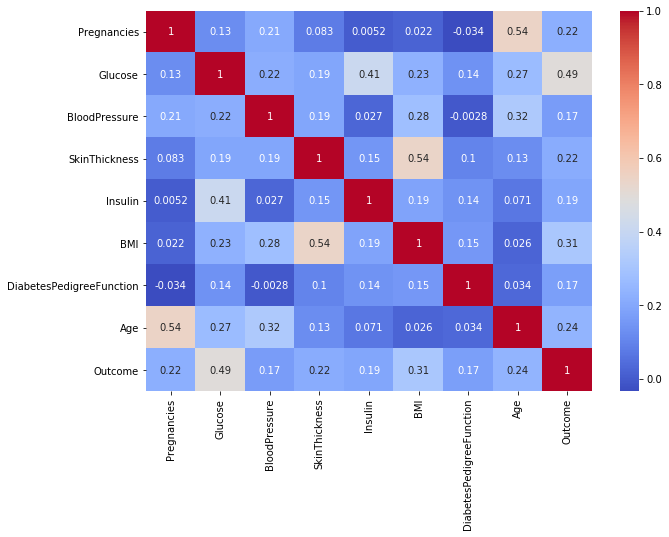

In [28]:
fig, ax = plt.subplots(figsize=(10,7))
sns.heatmap(diabetes2.corr(), annot = True, cmap="coolwarm");

**Inference:** _Comparatively higher correlation between_ 
+ Age and pregnancies, which is normal.
+ SkinThickness and BMI, which also can be related  

had there been any correlation value been > 0.8 we would have selected 
one feature of the two

### **Step 8: Machine Learning Models**

This is a **binary classification** problem.  
The models we will apply are:
1. Logistic Regression
2. Naive Bayes Classifier (Gaussian)
3. SVM  (linear, poly, radial kernel)
4. Decision Tree
5. Random Forest

Then we conclude which is the best model to be applied.

#### **Importing the Libraries**

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### **Pre-step 1: Dividing into train and test set**

In [30]:
X = diabetes2.iloc[:, :8].values

In [31]:
Y = diabetes2.iloc[:,8].values

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=1)

In [33]:
# kfold = KFold(n_splits=10, random_state=10)

 #### **Pre-step 2: automatic outlier detection**

In [34]:
from sklearn.svm import OneClassSVM
ee = OneClassSVM(nu=0.01)
yhat = ee.fit_predict(X_train)
# select all rows that are not outliers
mask = yhat != -1
X_train, Y_train = X_train[mask, :], Y_train[mask]

#### **Setting DataFrame to store accuracies**

In [35]:
acc_stats = pd.DataFrame(columns=['Algorithm used', 'Train Score', 'Test Score'])

### **Model 1: Logistic Regression**

In [36]:
log = LogisticRegression()

In [37]:
log.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
Y_pred = log.predict(X_test)

In [39]:
Y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [40]:
Y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1])

In [41]:
tstSc = accuracy_score(Y_pred, Y_test) # store test score
print("Test Score: ", tstSc)

Test Score:  0.7662337662337663


In [42]:
trSc = log.score(X_train, Y_train) # store train scrore
print("Train Score: ", trSc)

Train Score:  0.7791411042944786


In [43]:
confusion_matrix(Y_pred, Y_test)

array([[41, 11],
       [ 7, 18]])

In [44]:
print(classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82        52
           1       0.62      0.72      0.67        25

    accuracy                           0.77        77
   macro avg       0.74      0.75      0.74        77
weighted avg       0.78      0.77      0.77        77



In [45]:
# cross_val_score(log, X, Y, cv=kfold, scoring='accuracy').mean()

In [46]:
temp = pd.DataFrame([["Logistic Regression", trSc, tstSc]], columns=['Algorithm used', 'Train Score', 'Test Score'])
acc_stats = pd.concat([acc_stats, temp], sort=False, ignore_index=True)


**Inference:**   
Train Score : 77  
Test Score :  76

### **Model 2: Naive Bayes (Gaussian)**

In [47]:
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, Y_train)
y_pred = nvclassifier.predict(X_test)
tstSc = accuracy_score(y_pred, Y_test)
trSc = nvclassifier.score(X_train, Y_train)
print("Test Score: ", tstSc, "\nTrain Score: ", trSc)

Test Score:  0.7662337662337663 
Train Score:  0.7484662576687117


In [48]:
confusion_matrix(y_pred, Y_test)

array([[41, 11],
       [ 7, 18]])

In [49]:
print(classification_report(y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.85      0.79      0.82        52
           1       0.62      0.72      0.67        25

    accuracy                           0.77        77
   macro avg       0.74      0.75      0.74        77
weighted avg       0.78      0.77      0.77        77



In [50]:
temp = pd.DataFrame([["Naive Bayes Classifier (Gaussian)", trSc, tstSc]], columns=['Algorithm used', 'Train Score', 'Test Score'])
acc_stats = pd.concat([acc_stats, temp], sort=False, ignore_index=True)

### **Model 3: SVM**

##### **Using Linear Kernel**

In [51]:
clf = svm.SVC(kernel='linear')
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
tstSc = accuracy_score(y_pred, Y_test)
trSc = clf.score(X_train, Y_train)
print("Test Score: ", tstSc, "\nTrain Score: ", trSc)

Test Score:  0.7922077922077922 
Train Score:  0.7714723926380368


In [52]:
temp = pd.DataFrame([["SVM (Linear Kernel)", trSc, tstSc]], columns=['Algorithm used', 'Train Score', 'Test Score'])
acc_stats = pd.concat([acc_stats, temp], sort=False, ignore_index=True)

##### **Using Polynomial Kernel**

In [53]:
clf = svm.SVC(kernel='poly', C=0.1)
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
tstSc = accuracy_score(y_pred, Y_test)
trSc = clf.score(X_train, Y_train)
print("Test Score: ", tstSc, "\nTrain Score: ", trSc)

Test Score:  0.6883116883116883 
Train Score:  0.74079754601227


In [54]:
temp = pd.DataFrame([["SVM (Polynomial Kernel)", trSc, tstSc]], columns=['Algorithm used', 'Train Score', 'Test Score'])
acc_stats = pd.concat([acc_stats, temp], sort=False, ignore_index=True)

##### **Using Radial Kernel**

In [55]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, Y_train)
y_pred = clf.predict(X_test)
tstSc = accuracy_score(y_pred, Y_test)
trSc = clf.score(X_train, Y_train)
print("Test Score: ", tstSc, "\nTrain Score: ", trSc)

Test Score:  0.8051948051948052 
Train Score:  0.8205521472392638


In [56]:
temp = pd.DataFrame([["SVM (Radial Kernel)", trSc, tstSc]], columns=['Algorithm used', 'Train Score', 'Test Score'])
acc_stats = pd.concat([acc_stats, temp], sort=False, ignore_index=True)

In [57]:
print("Confusion matrix:\n", confusion_matrix(y_pred, Y_test))
print(classification_report(y_pred, Y_test))

Confusion matrix:
 [[45 12]
 [ 3 17]]
              precision    recall  f1-score   support

           0       0.94      0.79      0.86        57
           1       0.59      0.85      0.69        20

    accuracy                           0.81        77
   macro avg       0.76      0.82      0.78        77
weighted avg       0.85      0.81      0.81        77



 

**Inference:** This model has the best accuracy, as we have compared later.
Analysis of Confusion matrix:
+ Precision and recall values of 0 (no diabetes) is significantly more than 1.  
Thus, the model can make better prediction that a person does **NOT have Diabetes.**

### **Model 4: Decision Tree**

In [58]:
model=DecisionTreeClassifier(criterion='entropy',splitter='best',random_state=1, min_samples_split=0.1)
model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.1,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')

In [59]:
y_pred=model.predict(X_test)
tstSc = accuracy_score(y_pred, Y_test)
trSc = model.score(X_train, Y_train)
print("Test Score: ", tstSc, "\nTrain Score: ", trSc)
print("Conf matirx:\n", confusion_matrix(y_pred, Y_test))
print(classification_report(y_pred, Y_test))

Test Score:  0.8051948051948052 
Train Score:  0.8128834355828221
Conf matirx:
 [[41  8]
 [ 7 21]]
              precision    recall  f1-score   support

           0       0.85      0.84      0.85        49
           1       0.72      0.75      0.74        28

    accuracy                           0.81        77
   macro avg       0.79      0.79      0.79        77
weighted avg       0.81      0.81      0.81        77



In [60]:
temp = pd.DataFrame([["Decision Tree", trSc, tstSc]], columns=['Algorithm used', 'Train Score', 'Test Score'])
acc_stats = pd.concat([acc_stats, temp], sort=False, ignore_index=True)

### **Model 5: Random Forest**

In [61]:
model=RandomForestClassifier(n_estimators=150,criterion='entropy',random_state=1, min_samples_split=0.1)
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
tstSc = accuracy_score(y_pred, Y_test)
trSc = model.score(X_train, Y_train)
print("Test Score: ", tstSc, "\nTrain Score: ", trSc)
print("Conf matirx:\n", confusion_matrix(y_pred, Y_test))
print(classification_report(y_pred, Y_test))

Test Score:  0.7922077922077922 
Train Score:  0.8236196319018405
Conf matirx:
 [[44 12]
 [ 4 17]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        56
           1       0.59      0.81      0.68        21

    accuracy                           0.79        77
   macro avg       0.75      0.80      0.76        77
weighted avg       0.83      0.79      0.80        77



In [62]:
temp = pd.DataFrame([["Random Forest", trSc, tstSc]], columns=['Algorithm used', 'Train Score', 'Test Score'])
acc_stats = pd.concat([acc_stats, temp], sort=False, ignore_index=True)

### **Conclusion**

_Comparing accuracies to select the best model_

In [63]:
acc_stats

,Algorithm used,Train Score,Test Score
0,Logistic Regression,0.779141,0.766234
1,Naive Bayes Classifier (Gaussian),0.748466,0.766234
2,SVM (Linear Kernel),0.771472,0.792208
3,SVM (Polynomial Kernel),0.740798,0.688312
4,SVM (Radial Kernel),0.820552,0.805195
5,Decision Tree,0.812883,0.805195
6,Random Forest,0.823620,0.792208


In NaiveBayes and SVM(linear) we are getting underfitting, so we do not consider those two.  
From remaining, we can see SVM(radial) and DecTree have best Test Score.  
Among those two, SVM(Radial) has slightly better score.   
Therefore,  

**Best model: SVM (Radial kernel)**  
**Achieved accuracy: 82.05%**  

However, if we look at the classification reports the best balanced model is
**Decision Tree**
**Achieved accuracy: 81.28%**  
with **f1 score:**
+ 0 => 85
+ 1 =>74

### **Step 9: Further analysis on the data and visualisation**

#### **Clustering - Unsurpervised Learning**

In [64]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state = 0)

In [65]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [66]:
y_pred = kmeans.predict(X)

In [67]:
# y_pred

In [68]:
# Y

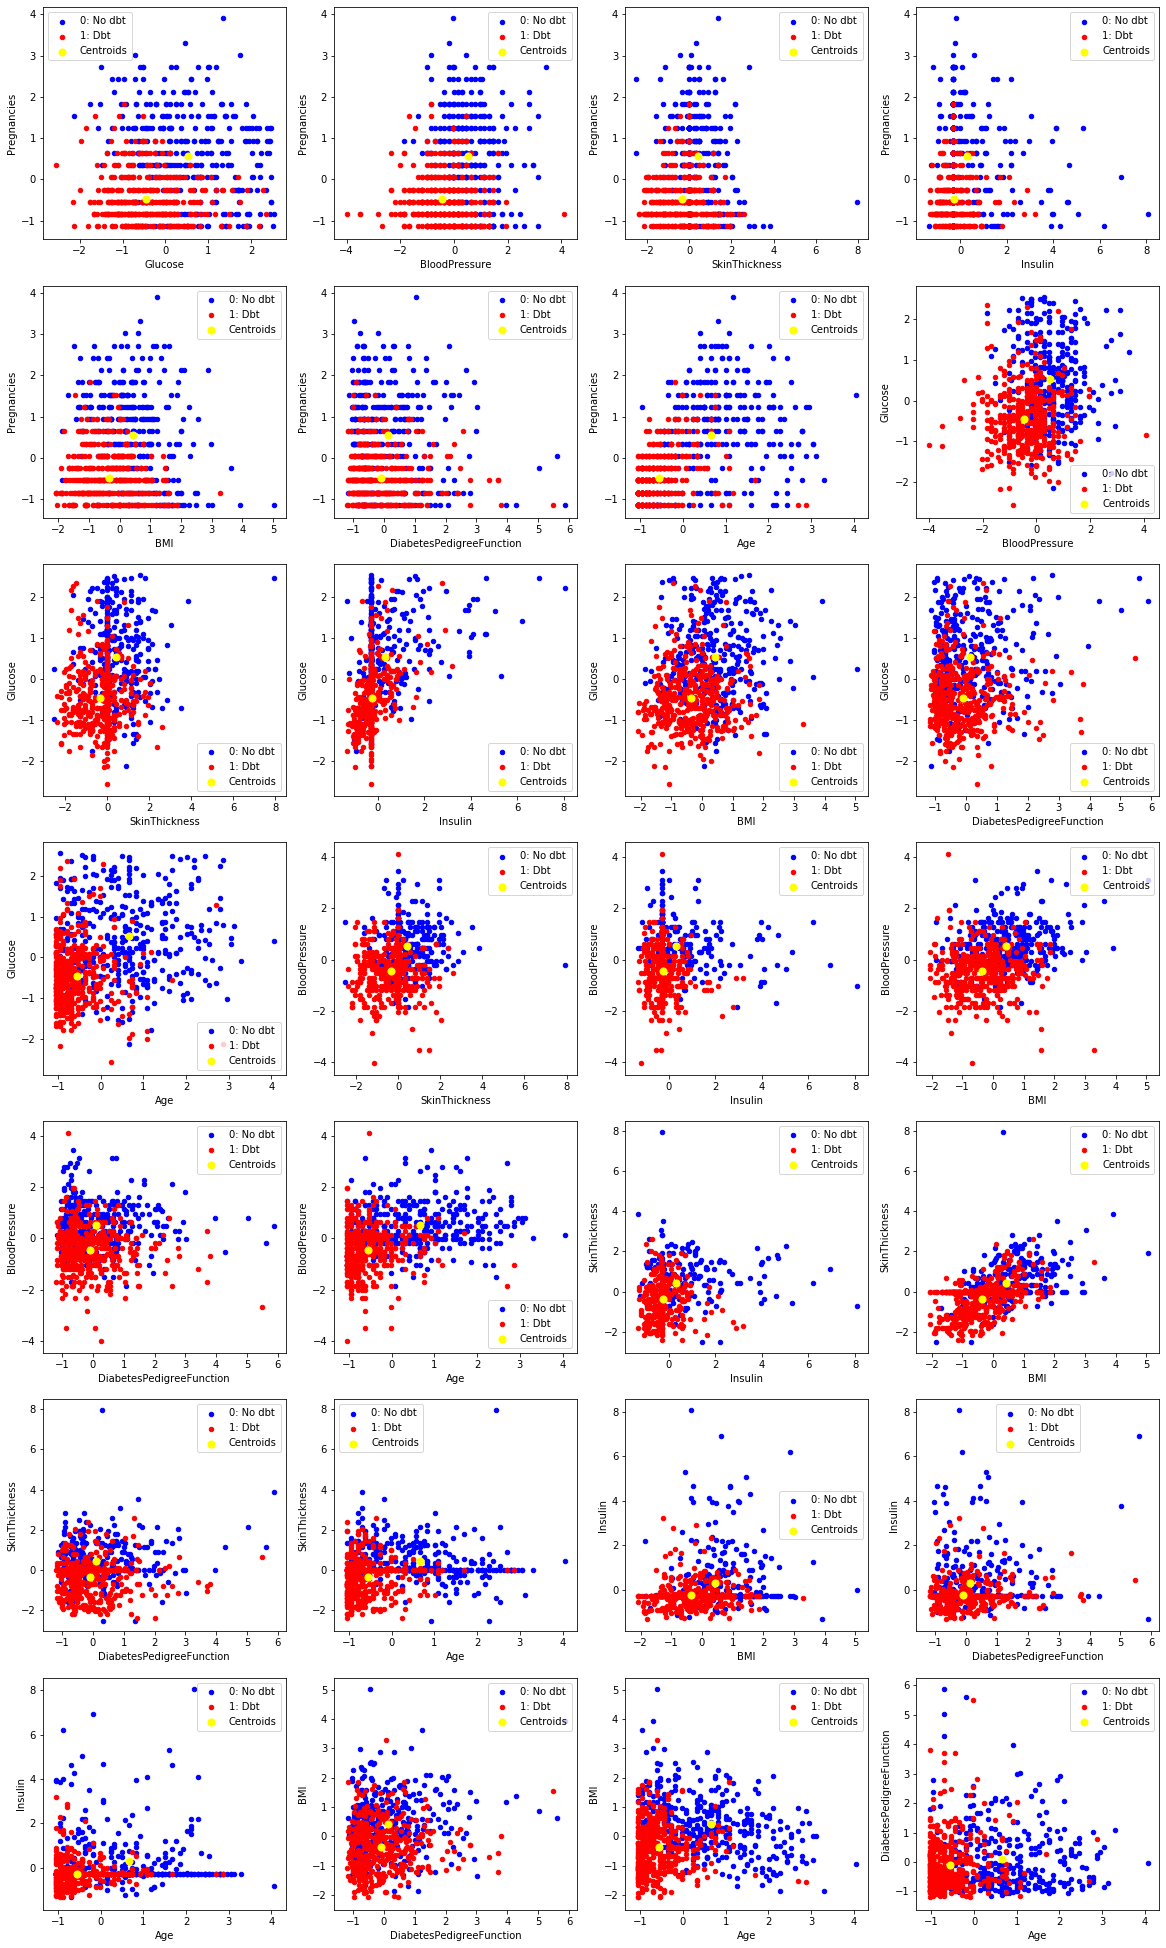

In [69]:
fig, axs = plt.subplots(ncols=4, nrows=7, figsize=(20, 35))
index = 0
axs = axs.flatten()
for i in range(len(X[0])):
    for j in range(i+1,len(X[0])):
        axs[index].scatter(X[y_pred == 0, j], X[y_pred == 0, i], s = 20, c = 'blue', label = '0: No dbt')
        axs[index].scatter(X[y_pred == 1, j], X[y_pred == 1, i], s = 20, c = 'red', label = '1: Dbt')
        axs[index].scatter(kmeans.cluster_centers_[:,j], kmeans.cluster_centers_[:,i], s = 50, c = 'yellow', label = 'Centroids')
        axs[index].legend()
        axs[index].set_xlabel(diabetes2.columns[j])
        axs[index].set_ylabel(diabetes2.columns[i])
        index+=1

**Inference:**  
_From the scatter plot of clustering we can conclude that if we are given values for following pair of features we can cluster the data into 2 groups (Diabetes and No diabetes):_
+ _Glucose-Age_
+ _Blood Pressure-Age_
+ _Pregnancies-Age_
+ _Pregnancies-Blood Pressure_

#### **Age and Diabetes**

In [70]:
pd.DataFrame(diabetes1.groupby(['Age', 'Outcome'])['Outcome'].count())

Outcome
Age Outcome         
21  0             58
    1              5
22  0             61
    1             11
23  0             31
...              ...
68  0              1
69  0              2
70  1              1
72  0              1
81  0              1

[96 rows x 1 columns]

**Inference:** _The age has several discrete values for that we can divide it into ranges.  
Automatic dividing age into range is done using cut_

In [71]:
diabetes3 = diabetes1.copy(deep=True)
diabetes3['AgeBand'] = pd.cut(diabetes1['Age'], 8)

In [72]:
diabetes3[['AgeBand', 'Outcome']].groupby('AgeBand', as_index=False).agg({'Outcome': ['sum','count']})
# how many have diabetes in that range

AgeBand Outcome      
                     sum count
0  (20.94, 28.5]      71   367
1   (28.5, 36.0]      70   147
2   (36.0, 43.5]      56   113
3   (43.5, 51.0]      38    68
4   (51.0, 58.5]      22    38
5   (58.5, 66.0]       9    26
6   (66.0, 73.5]       2     8
7   (73.5, 81.0]       0     1

In [73]:
diabetes3['AgeBand'] = 0

_Age is divided manually into age bands taking 10 years as range.  
For easier realisation and interpretation of data_

In [74]:
diabetes3.loc[diabetes3['Age'] <= 30, 'AgeBand'] = 0
diabetes3.loc[(diabetes3['Age'] > 30) & (diabetes3['Age'] <= 40), 'AgeBand'] = 1
diabetes3.loc[(diabetes3['Age'] > 40) & (diabetes3['Age'] <= 50), 'AgeBand'] = 2
diabetes3.loc[(diabetes3['Age'] > 50) & (diabetes3['Age'] <= 60), 'AgeBand'] = 3
diabetes3.loc[diabetes3['Age'] > 60, 'AgeBand'] = 4

In [75]:
diabetes3

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeBand
0,6,148.0,72.0,35.00000,105,33.6,0.627,50,1,2
1,1,85.0,66.0,29.00000,105,26.6,0.351,31,0,1
2,8,183.0,64.0,29.15342,105,23.3,0.672,32,1,1
3,1,89.0,66.0,23.00000,94,28.1,0.167,21,0,0
4,0,137.0,40.0,35.00000,168,43.1,2.288,33,1,1
...,...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180,32.9,0.171,63,0,4
764,2,122.0,70.0,27.00000,105,36.8,0.340,27,0,0
765,5,121.0,72.0,23.00000,112,26.2,0.245,30,0,0
766,1,126.0,60.0,29.15342,105,30.1,0.349,47,1,2


In [76]:
ageb_outcome_count = diabetes3.groupby(['AgeBand', 'Outcome'])['Outcome'].count()

In [77]:
ageb_count = diabetes3.groupby(['AgeBand'])['Outcome'].count()

In [78]:
ageb_analysis = ageb_outcome_count.div(ageb_count, level='AgeBand') * 100
ageb_analysis

AgeBand  Outcome
0        0          78.417266
         1          21.582734
1        0          51.592357
         1          48.407643
2        0          43.362832
         1          56.637168
3        0          42.592593
         1          57.407407
4        0          74.074074
         1          25.925926
Name: Outcome, dtype: float64

In [79]:
ageb_analysis[:,1]

AgeBand
0    21.582734
1    48.407643
2    56.637168
3    57.407407
4    25.925926
Name: Outcome, dtype: float64

**Inference:**   
_On comparing the relative percentages of people having diabetes in the different age groupps, we can conclude that:_  
_Most prone age group_ is group 3 that corresponds to _(50, 60]_

